### Some jottings in my notebook

#### DataFrames

In [1]:
import numpy as np
import pandas as pd

In [2]:
from numpy.random import randn

In [3]:
np.random.seed(101)#This makes sure the same set of random
#numbers are generated all the time.

In [4]:
#create a sample dataframe
df = pd.DataFrame(randn(5,4), ['A','B','C','D','E'], 
                 ['W','X','Y','Z'])
#The code above creates a dataframe of random standard
#normalized numbers in a 5 by 4 matrix(5 rows,4 columns).
#The 1st list contains the specified labels for the rows
#The second contains labels for the columns

In [5]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [6]:
#Using indexing to grab rows or columns
#This will return a series of all values in column W
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [7]:
#This returns the value at column W, row A
df['W']['A']

2.706849839399938

In [8]:
#this returns columns specified
df[['W','X']]

,W,X
A,2.706850,0.628133
B,0.651118,-0.319318
C,-2.018168,0.740122
D,0.188695,-0.758872
E,0.190794,1.978757


In [9]:
#I can add a new column to a dataframe like below
df['new'] = df['W'] + df['X'] #no need to add all 
#the existing columns.

In [10]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.334983
B,0.651118,-0.319318,-0.848077,0.605965,0.331800
C,-2.018168,0.740122,0.528813,-0.589001,-1.278046
D,0.188695,-0.758872,-0.933237,0.955057,-0.570177
E,0.190794,1.978757,2.605967,0.683509,2.169552


In [11]:
#to drop a column
df.drop('new',axis=1, inplace=True)
#The drop method accepts the column/row name, 
#the axis either 0/1 to specify column or row
#the inplace value True/False. If it's true,
#Pandas will remove it permanently from the dataframe



In [12]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [13]:
#Accessing rows
#This can be done in either of two ways
df.loc['C']
#The way above uses a pandas method loc which is 
#short for location, the I will pass the row label

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

In [14]:
df.iloc[0]
#The way above uses a pandas method iloc which is short
#for index location. It then accepts the numerical
#value for the index position of the row.
#Above example grabs the values in row with index 0
#which is the row with label A

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [15]:
df.loc['B','Y'] #This returns the value in row B,column Y

-0.8480769834036315

In [16]:
df.loc[['A', 'B'], ['W', 'Y']]
#This returns the values in rows A, B and columns W, Y

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


In [17]:
df > 0

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [18]:
#The blocks of code below is called conditional selection
booldf = df > 0
df[booldf]
#This returns a dataframe with values where the condition
#is true, if its false it puts NaN

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [19]:
#Faster way of writing the above code in cell 31
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [20]:
#Using conditional selection on a row or coluimn
df[df['W'] > 0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [21]:
df[df['Z'] < 0]

,W,X,Y,Z
C,-2.018168,0.740122,0.528813,-0.589001


In [22]:
df[df['W'] > 0]['X'] #this returns the column 'X' of the
#dataframe where value of column 'W' is greater than 0

A    0.628133
B   -0.319318
D   -0.758872
E    1.978757
Name: X, dtype: float64

In [23]:
df[df['W'] > 0][['Y','X']]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872
E,2.605967,1.978757


In [24]:
#Setting more than one conditions
df[(df['X'] > 0) & (df['Y'] > 1)]
#Both conditions must be true

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


In [25]:
df[(df['X'] > 0) | (df['Y'] > 1)]
#Either condition should be true

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
C,-2.018168,0.740122,0.528813,-0.589001
E,0.190794,1.978757,2.605967,0.683509


In [26]:
#Reset dataframe index
df.reset_index() 
#If I want this action to be permanent, just like .drop
#I should set inplace=True inside the brackets.

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [27]:
#I can add a new column with values like below
newindex = 'CA NY WY OR CO'.split()
#Here I use the split method to grenerate a list of five
# values from the string and set it to a variable
newindex

['CA', 'NY', 'WY', 'OR', 'CO']

In [28]:
df['States'] = newindex 
# Here I create a new column States and set the values
# to the elements in the newindex list.
# This runs witout any error since the number of elements
# in the list corresponds to that of the rows in the
# dataframe

In [29]:
df

,W,X,Y,Z,States
A,2.706850,0.628133,0.907969,0.503826,CA
B,0.651118,-0.319318,-0.848077,0.605965,NY
C,-2.018168,0.740122,0.528813,-0.589001,WY
D,0.188695,-0.758872,-0.933237,0.955057,OR
E,0.190794,1.978757,2.605967,0.683509,CO


In [30]:
#I can set a column as the index
df.set_index('States') #I av to use the inplace to retain
# this permanently else df still stays dsame if ran again

,W,X,Y,Z
States,,,,
CA,2.706850,0.628133,0.907969,0.503826
NY,0.651118,-0.319318,-0.848077,0.605965
WY,-2.018168,0.740122,0.528813,-0.589001
OR,0.188695,-0.758872,-0.933237,0.955057
CO,0.190794,1.978757,2.605967,0.683509


### Dealing with missing data in Pandas

In [31]:
#create a dataframe
d = {'A':[1,2, np.nan], 'B':[5,np.nan,np.nan], 
     'C':[1,2,3]}
#np.nan is used to represent null values.

In [32]:
df = pd.DataFrame(d)

In [33]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [34]:
#dropping null values
df.dropna() #this code drop any row with one or more 
# null value(s) since the .dropna method sets axis=0 
# by default

,A,B,C
0,1.0,5.0,1


In [35]:
df.dropna(axis=1) #here only the columns 
#with nan is dropped

,C
0,1
1,2
2,3


In [36]:
df.dropna(thresh=2)
# I can specify the threshold(thresh) value to an integer
# This tells pandas to only remove the row if it has
# the at least the specified threshold of nan values

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [37]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


### Filling the missing values

In [38]:
#Filling the nan values
df.fillna(value='Fill Value')

,A,B,C
0,1.0,5.0,1
1,2.0,Fill Value,2
2,Fill Value,Fill Value,3


Filling missing values depends heavily on the type of data
one is working with. In some cases, you fill with the mean
of the affected columns while in some other you fill with
something else.

In [39]:
# example 
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

### Pandas built in visualization methods
#### They allow for directly visualizing dataframes using pandas built in capabilities based off of matplotlib

# Plot Types

There are several plot types built-in to pandas, most of them statistical plots by nature:

* df.plot.area     
* df.plot.barh     
* df.plot.density  
* df.plot.hist     
* df.plot.line     
* df.plot.scatter
* df.plot.bar      
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie

You can also just call df.plot(kind='hist') or replace that kind argument with any of the key terms shown in the list above (e.g. 'box','barh', etc..)
___

In [44]:
%matplotlib inline
# To make the graphs look nice
import seaborn as sns

In [92]:
# These lines of code changes the default style of matplotlib starting from 2.0 version so that my plots will look nicer
# with borders etc.
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

In [93]:
df1 = pd.read_csv('../files/df1', index_col=0)
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [94]:
df2 = pd.read_csv('../files/df2')
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


<AxesSubplot:>

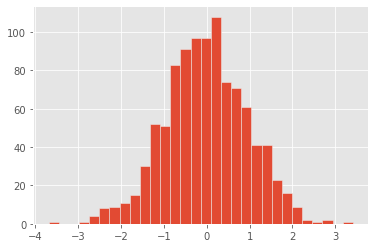

In [95]:
df1['A'].hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

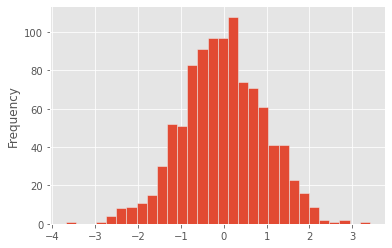

In [96]:
df1['A'].plot(kind='hist', bins=30)

<AxesSubplot:ylabel='Frequency'>

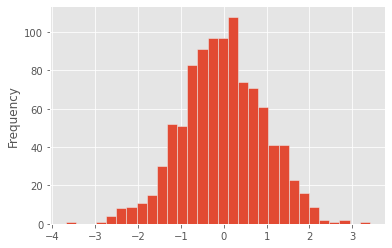

In [97]:
df1['A'].plot.hist(bins=30)

## Style Sheets

Matplotlib has [style sheets](http://matplotlib.org/gallery.html#style_sheets) you can use to make your plots look a little nicer. These style sheets include plot_bmh,plot_fivethirtyeight,plot_ggplot and more. They basically create a set of style rules that your plots follow. I recommend using them, they make all your plots have the same look and feel more professional. You can even create your own if you want your company's plots to all have the same look (it is a bit tedious to create on though).

Here is how to use them.

**Before plt.style.use() your plots look like above**

In [98]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<AxesSubplot:>

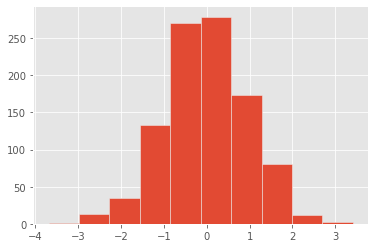

In [99]:
# With styling
df1['A'].hist()

<AxesSubplot:>

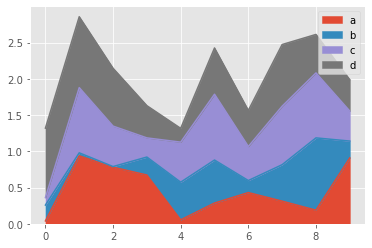

In [100]:
df2.plot.area()

<AxesSubplot:>

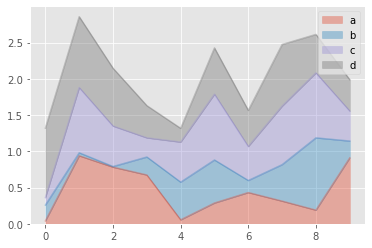

In [101]:
df2.plot.area(alpha=0.4)

<AxesSubplot:>

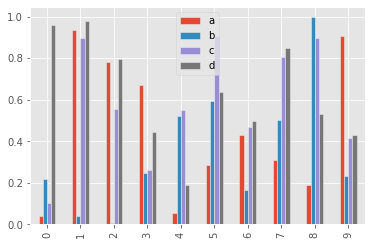

In [102]:
df2.plot.bar()#To use this plot be sure your data is categorical

<AxesSubplot:>

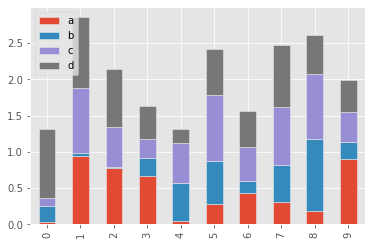

In [103]:
df2.plot.bar(stacked=True)

<AxesSubplot:>

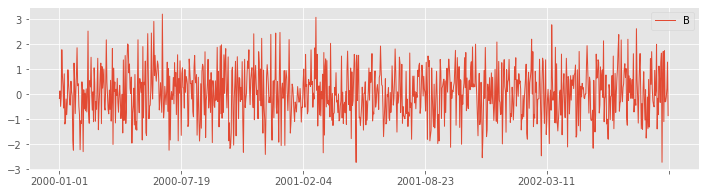

In [104]:
df1.plot.line(y='B',figsize=(12,3),lw=1)
# here x is set to the df index by default if I don't specify
# an alternative value

<AxesSubplot:xlabel='A', ylabel='B'>

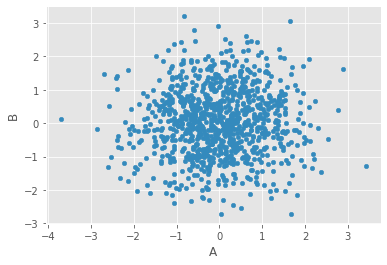

In [105]:
df1.plot.scatter(x='A', y='B')

<AxesSubplot:xlabel='A', ylabel='B'>

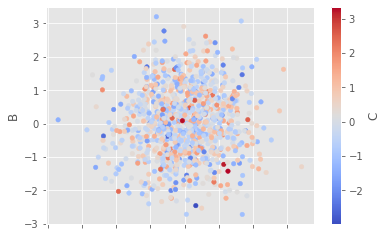

In [106]:
df1.plot.scatter(x='A', y='B', c='C', cmap='coolwarm')
# Here I specified that the plot should be color/segregated
# with the short hand c= using the C color, then I specified
# a color palette with cmap

C:\Users\Olawale\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<AxesSubplot:xlabel='A', ylabel='B'>

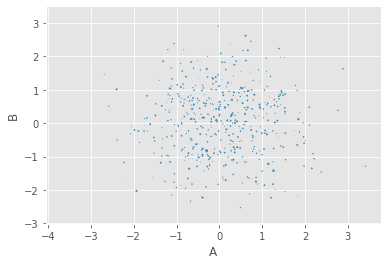

In [107]:
# I can also decide to segregate using size by specifying s=
# Then set it to a color of my choice. I may need to multiply
# the color with a large arbitrary value to make the points
# visible
df1.plot.scatter(x='A', y='B', s=df1['C'])

<AxesSubplot:xlabel='A', ylabel='B'>

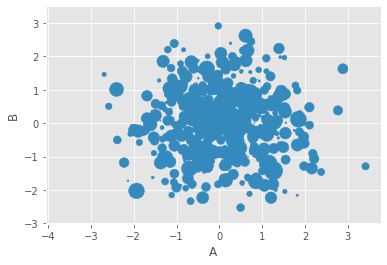

In [108]:
df1.plot.scatter(x='A', y='B', s=df1['C']*100)

<AxesSubplot:>

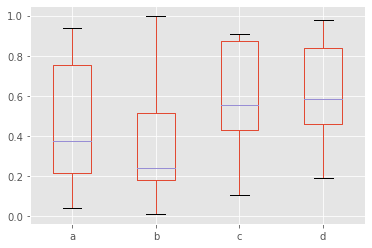

In [109]:
df2.plot.box() # Box plot

In [110]:
df = pd.DataFrame(np.random.randn(1000,2), columns=['a','b'])
df

,a,b
0,0.074889,0.497798
1,1.132548,-0.323487
2,-1.212366,0.993594
3,0.229763,-1.115627
4,1.062505,-0.206914
...,...,...
995,-1.016602,-1.035866
996,-0.286439,2.125604
997,-0.384841,-1.726306
998,0.039716,0.565867


<AxesSubplot:xlabel='a', ylabel='b'>

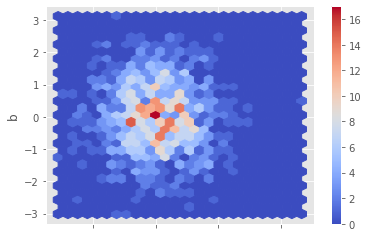

In [111]:
# Hexbins
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='coolwarm')

<AxesSubplot:ylabel='Density'>

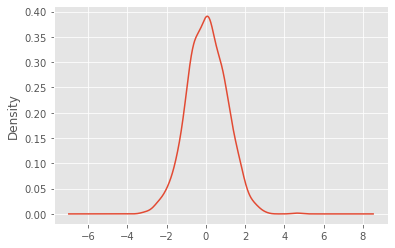

In [112]:
# kde plot
df['a'].plot.kde()

<AxesSubplot:ylabel='Density'>

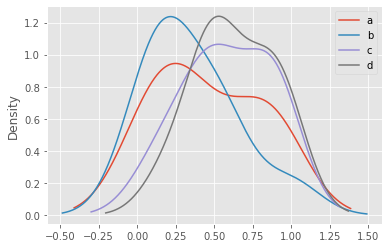

In [113]:
df2.plot.kde()